In [643]:
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import numpy as np

import os

In [644]:
PRED_CSV = '/opt/ml/challenge/submission_yolov5x_modified.csv'

labels = {0:'General trash',1:'Paper',2:'Paper pack',3:'Metal',4:'Glass',5:'Plastic',6:'Styrofoam',7:'Plastic bag',8:'Battery',9:'Clothing'}
label_colors = {0:'black',1:'darkcyan',2:'sienna',3:'gray',4:'navy',5:'chartreuse',6:'firebrick',7:'seagreen',8:'darkorchid',9:'olivedrab'}

data_dir = '/opt/ml/detection/dataset'

# load prediction
pred_df = pd.read_csv(PRED_CSV)

In [645]:
def get_data(ind,threshold=0.5):
    data = pred_df.loc[ind]
    img_id = data['image_id']
    box_list = np.array(data['PredictionString'].split())
    if len(box_list)!=1:
        box_list = box_list.reshape(-1,6)
    vis =[]
    for box in box_list:
        if float(box[1]) > threshold:
            vis.append(box.tolist())
    return img_id, np.array(vis)

In [646]:
def get_data_9(ind,threshold=0.5):
    img  = []
    vis=[]
    for i in range(9):
        data = pred_df.loc[ind+i]
        img_id = data['image_id']
        img.append(img_id)
        box_list=[[]]
        # import pdb; pdb.set_trace()
        if data['PredictionString']==data['PredictionString']:
            box_list = np.array(data['PredictionString'].split())
        if len(box_list)!=1 and len(box_list)!=0:
            box_list = box_list.reshape(-1,6)
        v=[]
        for box in box_list:
            # import pdb;pdb.set_trace()
            if len(box)==0:
                break
            if float(box[1])>threshold:
                v.append(box.tolist())
        vis.append(v)
    return img, np.array(vis)
        
                

In [647]:
def vis_img(img_id, vis):
    img_path = os.path.join(data_dir, img_id)
    im = np.array(Image.open(img_path), dtype=np.uint8)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(im)
    for bbox in vis:
        rect = patches.Rectangle((float(bbox[2]), float(bbox[3])), float(bbox[4])-float(bbox[2]),float(bbox[5])-float(bbox[3]), linewidth=2, edgecolor=label_colors[int(bbox[0])], facecolor='none')
        ax.text(float(bbox[2]),float(bbox[3]),s=labels[int(bbox[0])],
                color='white',
                backgroundcolor=label_colors[int(bbox[0])],
                )
        ax.add_patch(rect)
    plt.show()
    return img_path

In [648]:
def vis_img_9(img_id,vis):
    fig = plt.figure(figsize=(15,15))
    for i in range(9):
        img_path = os.path.join(data_dir,img_id[i])
        im = np.array(Image.open(img_path), dtype=np.uint8)
        ax = fig.add_subplot(3,3, i+1)
        ax.imshow(im)
        for bbox in vis[i]:
            if len(bbox)==0:
              break
          # import pdb; pdb.set_trace()
            rect = patches.Rectangle((float(bbox[2]), float(bbox[3])), float(bbox[4])-float(bbox[2]),float(bbox[5])-float(bbox[3]), linewidth=2, edgecolor=label_colors[int(bbox[0])], facecolor='none')
            ax.text(float(bbox[2]),float(bbox[3]),s=labels[int(bbox[0])],
                color='white',
                backgroundcolor=label_colors[int(bbox[0])],
                )
            ax.add_patch(rect)
    plt.show()

In [649]:
ind = [x for x in range(4000)]
i = iter(enumerate(ind))

In [650]:
# img_id, vis = get_data(1474,threshold=0.5)
# vis_img(img_id, vis)

<ipython-input-646-bb4a839db873>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return img, np.array(vis)


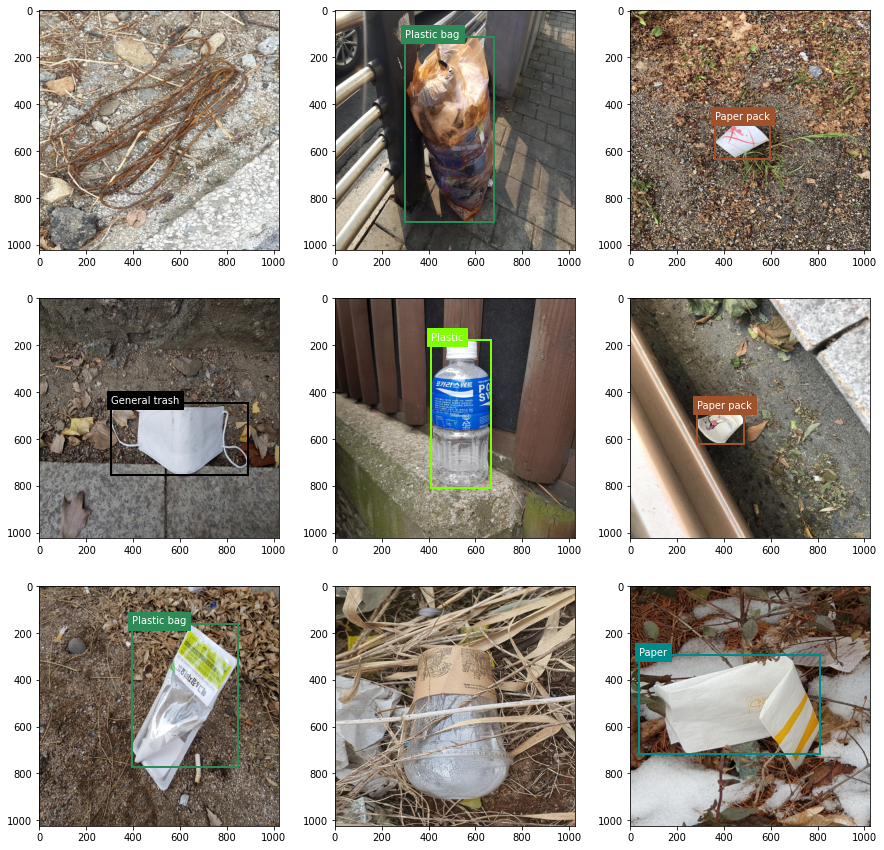

In [651]:
img_id, vis = get_data_9(1474)
vis_img_9(img_id, vis)